<a href="https://colab.research.google.com/github/aldoxd82/optimizacion1D/blob/master/Newton_Raphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**METODO DE NEWTON-RAPHSON**

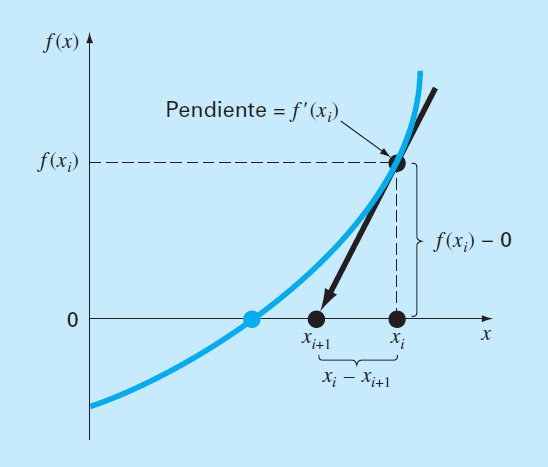

"Este metodo consiste en que si el valor inicial para la raíz es $xi$, entonces se puede trazar una tangente desde el punto $[x_i, f(x_i)]$ de la curva. Por lo común, el punto donde esta tangente cruza al eje $x$ representa una aproximación mejorada de la raíz" Chapra S. C. y Canale, R. P.(2007, pag 148).

En este caso entonces dicha tangente se puede representar como la derivada de la funcion en el punto x_i, es decir $f'(x_i)$ y por tanto definimos 

$x_r = x_i - \dfrac{f(x_i)}{f'(x_i)}$

A continuacion se presenta el codigo en python que ejecuta el algoritmo de Newthon - Raphson para encontrar la raiz de $f(x)$ dado un valor inicial de $x$




## **Ejemplo**

sea $f(x) = sen(x) - \dfrac{2}{1 + x^2}$ hallar una aproximación de la raíz con un error menor o igual a 0.001, tomando como punto inicial $x = 0$ usando el método de Newton - Raphson.



###**Solucion**

Aplicando el metodo de Newton - Raphson, donde la derivada de la funcion es:

$$f'(x) = cos(x) + \dfrac{4x}{(x^2 + 1)^2}$$

### **Funcion metodo de Newton Raphson**

In [ ]:
#NEWTON-RAPSHON

def NewtonRaphson(x1, es, imax):
  x = x1                              #aproximaciones de la raiz
  xv = []                             #vector que guarda las aproximaciones de la raiz
  ea = 2*es                           #error absoluto
  eav = []                            #vector que guarda el error absoluto
  i = 0                               #numero de iteraciones
  niter = []                          #vector del numero de iteraciones
  fxv = []                            #vector de la funcion f(x)
  Newton_table = []                   #tabla de datos del metodo newton - raphson

  Newton_table.append([i, x, f1(x), f(x), "--", "--"])
  xv.append(x)

  while ea > es and i <= imax:
    x = x - f(x)/f1(x)                #formula de newton - raphson
    xv.append(x)                      
    fxv.append(f1(x))
    i += 1
    niter.append(i)
    
    if x != 0:
      ea = abs((xv[i] - xv[i-1]))
      er = abs((xv[i] - xv[i-1])/xv[i])*100           #error relativo
      eav.append(ea)
    
    Newton_table.append([i, x, f1(x), f(x), ea, er])

  #Tabla de de datos
  print(" ")
  print("Metodo Newton-Raphson")
  print(tabulate(Newton_table, headers = ["Iteracion", "x", "f'(x)", "f(x)", "e abs", "er (%)"]))

  return(x, f(x))

####**Script de solución**

 
Metodo Newton-Raphson
  Iteracion        x       f'(x)          f(x)  e abs                   er (%)
-----------  -------  ----------  ------------  ----------------------  ---------------------
          0  0         1          -2            --                      --
          1  2        -0.0961468   0.509297     2.0                     100.0
          2  7.29708   0.538478    0.812028     5.297079395596803       72.59177416643105
          3  5.78907   0.899829   -0.5322       1.508007478014747       26.049209605338643
          4  6.38052   1.00994     0.0492293    0.5914452513009563      9.269550345939997
          5  6.33177   1.01382    -0.000104229  0.048744920179594864    0.7698463915782277
          6  6.33188   1.01381    -2.93189e-10  0.00010280809231844046  0.0016236595225943514
Grafica de la funcion


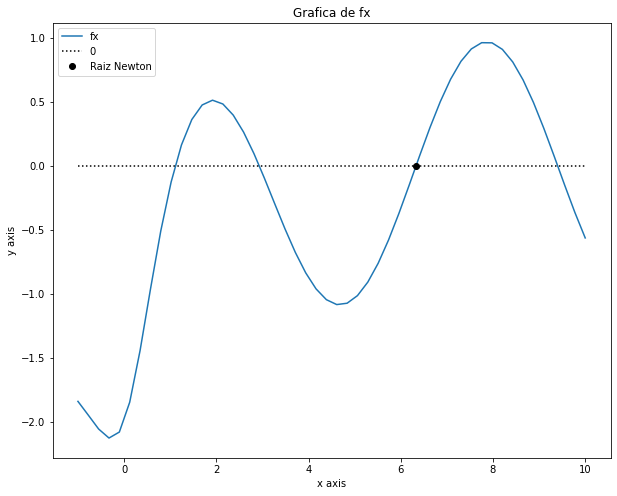

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

#Valores para graficar la funcion
a = -1           #Valor inicial del rango de x para graficar
b = 10           #Valor final del rango de x para graficar
n = 50           #Cantidad de puntos


#Parametros para controlar las aproximaciones
emax = 10**-3
itermax = 20
x1 = 0


#f(x)
x = np.linspace(a, b, n)     #Se generan los valores de x para construir la grafica
def f(xs):
  f_x = np.sin(xs) - 2/(xs**2 + 1)  #Valor de la funcion para cada x
  return (f_x)

#f'(x) - Derivada de f(x)
def f1(xs):
  f1_x = np.cos(xs) + 4*xs/((xs**2 + 1)**2)
  return (f1_x)

fx = f(x)                     

#Newton - Raphson

xr, yr = NewtonRaphson(x1, emax, itermax)

print("Grafica de la funcion")
plt.figure(figsize=(10, 8))
plt.plot(x, fx, label=("fx"))
plt.plot(x, np.zeros(len(x)), 'k:', label=("0"))
plt.plot(xr, yr, 'ko', label=("Raiz Newton"))
plt.xlabel("x axis")            #Etiqueta de eje
plt.ylabel("y axis")            #Etiqueta de eje
plt.title("Grafica de fx") #Titulo del grafico
plt.legend()                    #Leyendas
plt.show()                      #Mostrar grafico
